In [1]:
#import dependencies
import pandas as pd
import preprocess
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut

from sklearn.metrics import confusion_matrix, classification_report,roc_curve,roc_auc_score,accuracy_score

from sklearn.linear_model import LogisticRegression #for Logistic Regression
from sklearn import svm # for Support Vector Machine
from sklearn.naive_bayes import GaussianNB # for Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier # for KNN classifier 
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.tree import DecisionTreeClassifier # for decision tree classifier

# Preprocessing

In [2]:
## Read the wisconsin dataset
breast_ca = pd.read_csv('Dataset/breast-cancer-wisconsin.data',index_col=None,header=None)

## Run clean_impute function on dataset and save dataset (impute - MICE method)
df_impute = preprocess.clean_impute(breast_ca)
df_impute.to_csv('Dataset/processed/breast-cancer-wisconsin-imputed.csv',index=False)

## Read imputed wisconsin dataset
df = pd.read_csv("Dataset/processed/breast-cancer-wisconsin-imputed.csv")

Columns renaming successful
All '?' values replaced with 'NaN'

Calculate missing values from dataframe
sample_id            0
cl_thcknss           0
size_cell_un         0
shape_cell_un        0
marg_adhesion        0
size_cell_single     0
bare_nucl           16
bl_chrmatn           0
nrml_nucleo          0
mitoses              0
class                0
dtype: int64

Null values imputated using Multivariate Imputation by Chained Equation (MICE) method

Calculate missing values from imputated dataframe
sample_id           0
cl_thcknss          0
size_cell_un        0
shape_cell_un       0
marg_adhesion       0
size_cell_single    0
bare_nucl           0
bl_chrmatn          0
nrml_nucleo         0
mitoses             0
class               0
dtype: int64



In [3]:
# Remove the sample_id column
df = df.drop(columns=['sample_id'])

# Split the dataset into features/variables (X) and labels/outcome (y)
# Change values of 'class' from [2,4] to [0,1]
X = df.drop(columns=['class'])
y = df['class'].apply(lambda x: 1 if x == 4 else 0)

In [4]:
# Scale the features - Min and Max scaling (sensitive to outliers)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Descriptive Statistics

# Logistic Regression

In [5]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# Run supervised learning - Logistic Regression algorithm
model = LogisticRegression()

In [6]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
predictions = []
probabilities = []
scores = []

In [7]:
# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train classifier
    model.fit(X_train,y_train)
    
    # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]

    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])
    scores.append(accuracy_score(y_test, predicted_y))

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [8]:
# Calculate false +ve rate, true +ve rate and threshold values
fpr, tpr, thresholds = roc_curve(y,probabilities)

# Calculate area under the curve
roc_auc = roc_auc_score(y,probabilities)

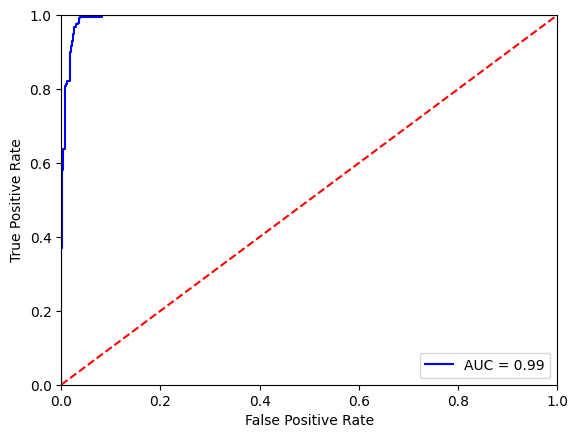

In [9]:
# Plot the ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
# Calculate confusion matrix
logreg_cm = confusion_matrix(y,predictions)

# Calculate the mean accuracy
score_logreg = sum(scores) / len(scores)
print("Accuracy:", score_logreg)

Accuracy: 0.9642346208869814


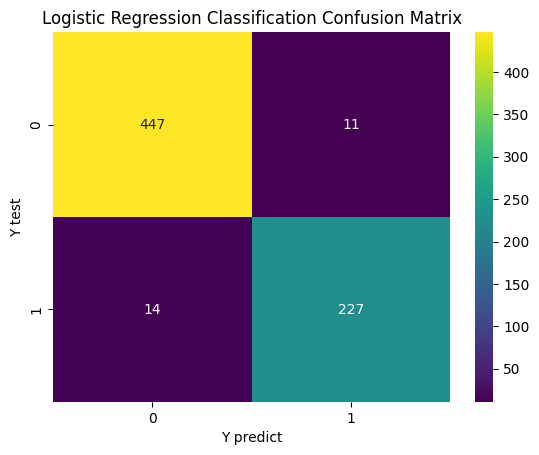

In [11]:
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(logreg_cm,annot=True,fmt='d',cmap='viridis')
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [12]:
# Comprehensive Classification Report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       458
           1       0.95      0.94      0.95       241

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



In [13]:
# Combine the true labels and predicted labels into a dataframe
df2 = pd.DataFrame({'Actual': y, 'Predicted': predictions})

In [14]:
df2

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Naive Bayes - Gaussian

In [15]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# Run supervised learning - Gaussian Naive Bayes algorithm
model = GaussianNB()

In [16]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
predictions = []
probabilities = []
scores = []

In [17]:
# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model using the training sets
    model.fit(X_train,y_train)
        
   # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])
    scores.append(accuracy_score(y_test, predicted_y))

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [18]:
# Calculate false +ve rate, true +ve rate and threshold values
fpr, tpr, thresholds = roc_curve(y,probabilities)

# Calculate area under the curve
roc_auc = roc_auc_score(y,probabilities)

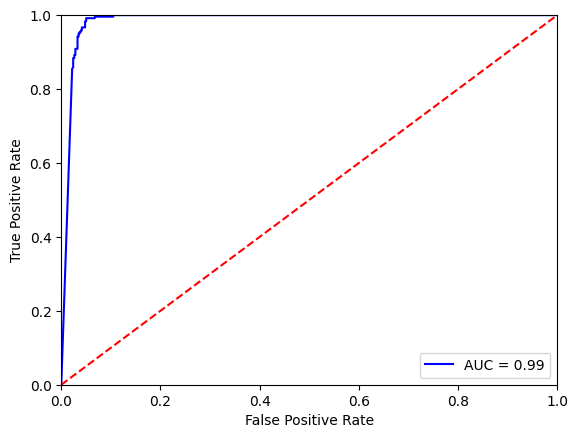

In [19]:
# Plot the ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
# Calculate confusion matrix
nbcla_cm = confusion_matrix(y,predictions)

# Calculate the mean accuracy
score_nbcla = sum(scores) / len(scores)
print("Accuracy:", score_nbcla)

Accuracy: 0.9585121602288984


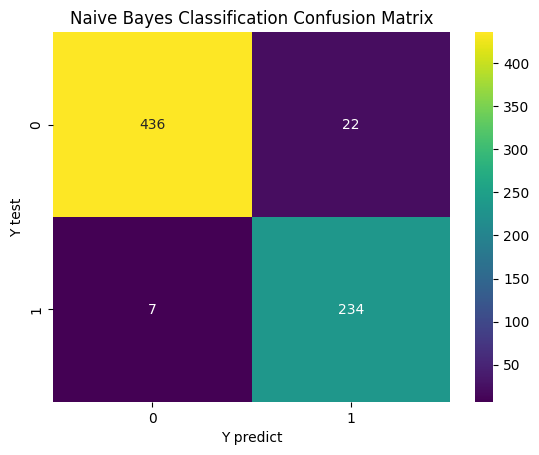

In [21]:
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(nbcla_cm,annot=True,fmt='d',cmap='viridis')
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [22]:
# Comprehensive Classification Report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       458
           1       0.91      0.97      0.94       241

    accuracy                           0.96       699
   macro avg       0.95      0.96      0.95       699
weighted avg       0.96      0.96      0.96       699



In [23]:
# Combine the true labels and predicted labels into a dataframe
df3 = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df3

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Support Vector Machine (SVM)

In [24]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# Run supervised learning - Support Vector Machine algorithm
model = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
        max_iter=-1, probability=True, random_state=None, shrinking=False,
        tol=0.001, verbose=False)

In [25]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
predictions = []
probabilities = []
scores = []

In [26]:
# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model using the training sets
    model.fit(X_train,y_train)
        
   # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])
    scores.append(accuracy_score(y_test, predicted_y))
    
# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [27]:
# Calculate false +ve rate, true +ve rate and threshold values
fpr, tpr, thresholds = roc_curve(y,probabilities)

# Calculate area under the curve
roc_auc = roc_auc_score(y,probabilities)

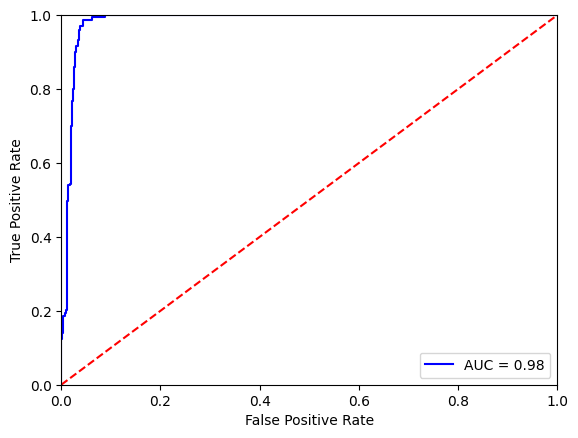

In [28]:
# Plot the ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
# Calculate confusion matrix
svmcla_cm = confusion_matrix(y,predictions)

# Calculate the mean accuracy
score_svmcla = sum(scores) / len(scores)
print("Accuracy:", score_svmcla)

Accuracy: 0.9570815450643777


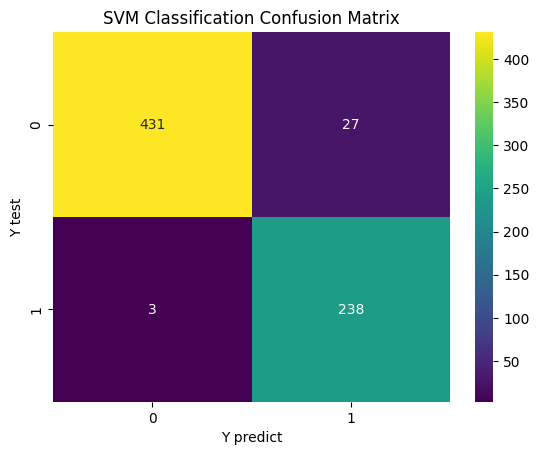

In [30]:
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(svmcla_cm,annot=True,fmt='d',cmap='viridis')
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [31]:
# Comprehensive Classification Report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       458
           1       0.90      0.99      0.94       241

    accuracy                           0.96       699
   macro avg       0.95      0.96      0.95       699
weighted avg       0.96      0.96      0.96       699



In [32]:
# Combine the true labels and predicted labels into a dataframe
df4 = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df4

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# K-Nearest Neighbour (KNN)

In [33]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# Run supervised learning - K-Nearest Neighbour algorithm
k=3
model = KNeighborsClassifier(n_neighbors=k)

In [34]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
predictions = []
probabilities = []
scores = []

In [35]:
# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model using the training sets
    model.fit(X_train,y_train)
   
    # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])
    scores.append(accuracy_score(y_test, predicted_y))

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [36]:
# Calculate false +ve rate, true +ve rate and threshold values
fpr, tpr, thresholds = roc_curve(y,probabilities)

# Calculate area under the curve
roc_auc = roc_auc_score(y,probabilities)

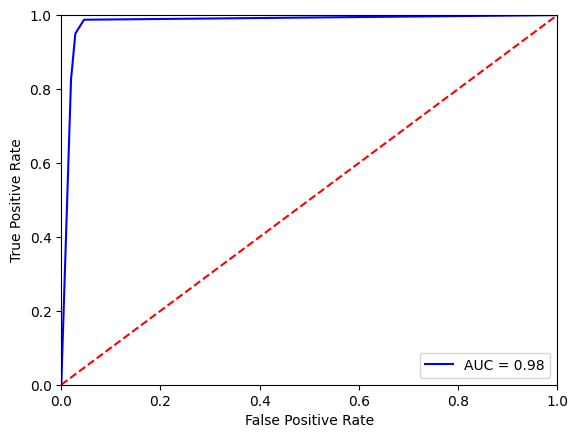

In [37]:
# Plot the ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
# Calculate confusion matrix
knncla_cm = confusion_matrix(y,predictions)

# Calculate the mean accuracy
score_knncla = sum(scores) / len(scores)
print("Accuracy:", score_knncla)

Accuracy: 0.9642346208869814


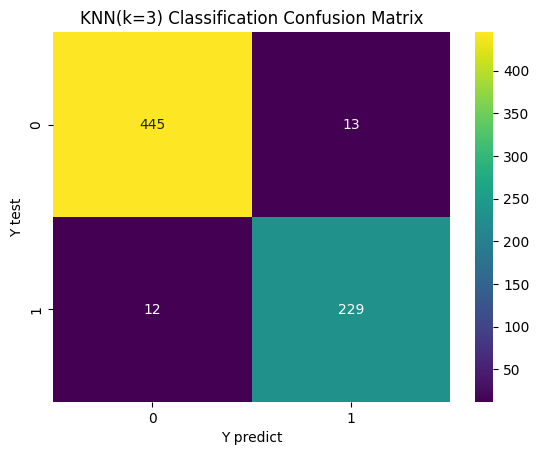

In [39]:
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(knncla_cm,annot=True,fmt='d',cmap='viridis')
plt.title('KNN(k=3) Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [40]:
# Comprehensive Classification Report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       458
           1       0.95      0.95      0.95       241

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



In [41]:
# Combine the true labels and predicted labels into a dataframe
df5 = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df5

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Random Forest Classifier

In [42]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# Run supervised learning - Random Forest Classifier algorithm
model=RandomForestClassifier()

In [43]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
predictions = []
probabilities = []
scores = []

In [44]:
# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model using the training sets
    model.fit(X_train,y_train)
   
    # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])
    scores.append(accuracy_score(y_test, predicted_y))

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [45]:
# Calculate false +ve rate, true +ve rate and threshold values
fpr, tpr, thresholds = roc_curve(y,probabilities)

# Calculate area under the curve
roc_auc = roc_auc_score(y,probabilities)

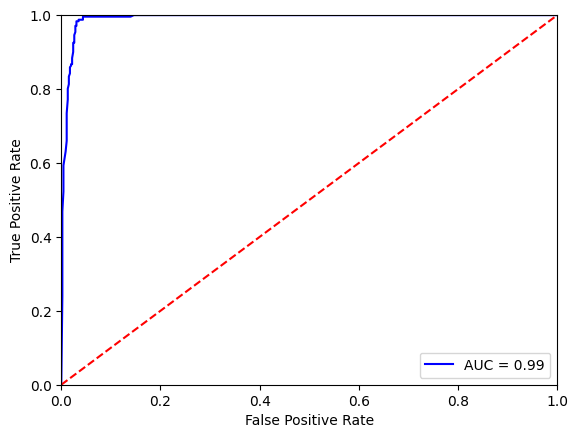

In [46]:
# Plot the ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
# Calculate confusion matrix
rfcla_cm = confusion_matrix(y,predictions)

# Calculate the mean accuracy
score_rfcla = sum(scores) / len(scores)
print("Accuracy:", score_rfcla)

Accuracy: 0.9713876967095851


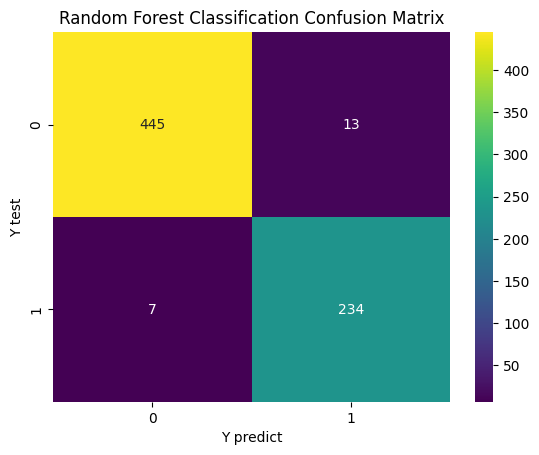

In [48]:
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(rfcla_cm,annot=True,fmt='d',cmap='viridis')
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [49]:
# Comprehensive Classification Report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       458
           1       0.95      0.97      0.96       241

    accuracy                           0.97       699
   macro avg       0.97      0.97      0.97       699
weighted avg       0.97      0.97      0.97       699



In [50]:
# Combine the true labels and predicted labels into a dataframe
df6 = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df6

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Decision Tree Classifier

In [51]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# Run supervised learning - Decision Tree Classifier algorithm
model=DecisionTreeClassifier()

In [52]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
predictions = []
probabilities = []
scores = []

In [53]:
# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model using the training sets
    model.fit(X_train,y_train)
   
    # Get prediction
    predicted_y = model.predict(X_test)
    
    # Get probability
    probability_y = model.predict_proba(X_test)[:,1]
    
    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])
    scores.append(accuracy_score(y_test, predicted_y))

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [54]:
# Calculate false +ve rate, true +ve rate and threshold values
fpr, tpr, thresholds = roc_curve(y,probabilities)

# Calculate area under the curve
roc_auc = roc_auc_score(y,probabilities)

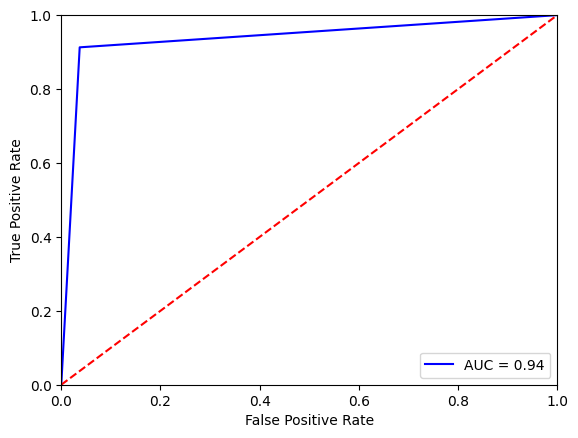

In [55]:
# Plot the ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
# Calculate confusion matrix
dtcla_cm = confusion_matrix(y,predictions)

# Calculate the mean accuracy
score_dtcla= sum(scores) / len(scores)
print("Accuracy:", score_dtcla)

Accuracy: 0.9456366237482118


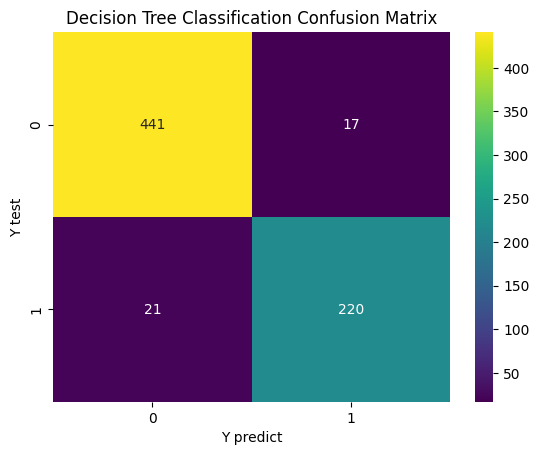

In [57]:
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(dtcla_cm,annot=True,fmt='d',cmap='viridis')
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [58]:
# Comprehensive Classification Report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       458
           1       0.93      0.91      0.92       241

    accuracy                           0.95       699
   macro avg       0.94      0.94      0.94       699
weighted avg       0.95      0.95      0.95       699



In [59]:
# Combine the true labels and predicted labels into a dataframe
df7 = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df7

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


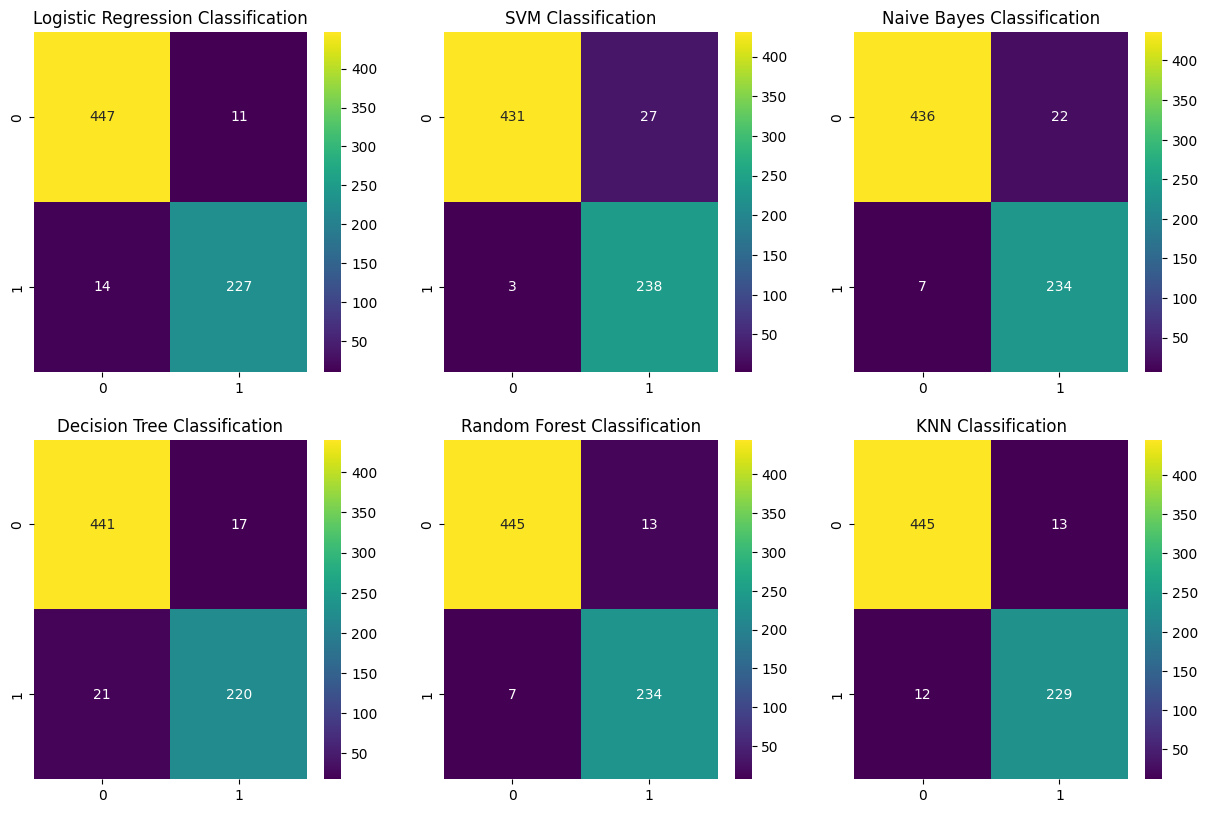

In [60]:
# The confusion matrix
# Confusion matrix is a specific table layout that allows visualization of the performance of an algorithm for supervised learning.
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Naive Bayes Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Random Forest Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('KNN Classification')
sns.heatmap(data=logreg_cm, annot=True,cmap="viridis" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True,cmap="viridis" ,fmt='g', ax=ax2)  
sns.heatmap(data=nbcla_cm, annot=True,cmap="viridis" ,fmt='g', ax=ax3)
sns.heatmap(data=dtcla_cm, annot=True,cmap="viridis" ,fmt='g', ax=ax4)
sns.heatmap(data=rfcla_cm, annot=True,cmap="viridis" ,fmt='g', ax=ax5)
sns.heatmap(data=knncla_cm, annot=True,cmap="viridis" ,fmt='g', ax=ax6)
plt.show()

In [61]:
# Comparison of classification techniques
Accuracyscores = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, score_rfcla, score_knncla], 
                        index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Accuracyscores)

Logistic Regression Score       0.964235
Support Vector Machine Score    0.957082
Naive Bayes Score               0.958512
Decision Tree Score             0.945637
Random Forest Score             0.971388
K-Nearest Neighbour Score       0.964235
dtype: float64
